In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import glob
import mediapipe as mp

In [2]:
mpHands = mp.solutions.hands # Load mediapipe hands module
hands = mpHands.Hands( # Initialize hands model
    max_num_hands=2,
    model_complexity=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    static_image_mode=False)

def findHands(img):
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Transform to RGB
    results = hands.process(imgRGB) # Feeding image through Hands model
    
    return results # Returning values from model prediction

In [3]:
mpFace = mp.solutions.face_mesh # Load mediapipe face module

faces = mpFace.FaceMesh( # Initialize Face model
    
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    static_image_mode=False)

def findFace(img):
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Transform image to RGB
    results = faces.process(imgRGB) # Feeding image through Face model
    
    return results # Returning values from model prediction

In [4]:
mpDrawHands = mp.solutions.drawing_utils # Initializing drawing object for hands
mpDrawFace = mp.solutions.drawing_utils # Initializing drawing object for Face
mp_drawing_styles =mp.solutions.drawing_styles
mp_drawing_face = mpDrawFace.DrawingSpec(color=(0,0,200),thickness=0,circle_radius=1) #Initializing drawing specifications for face
mp_drawing_hands = mpDrawHands.DrawingSpec(color=(255,0,0),thickness=0,circle_radius=1) #Initializing drawing specifications for hand

def drawLandmarks(img,resultsFace,resultsHands):
    if resultsFace.multi_face_landmarks:
        for face_landmarks in resultsFace.multi_face_landmarks:   
            mpDrawFace.draw_landmarks( # Draw face lendmark
              image=img,
              landmark_list=face_landmarks,
              connections=mpFace.FACEMESH_CONTOURS,
                landmark_drawing_spec=mp_drawing_face,
              
              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
              )
            
    if resultsHands.multi_hand_landmarks:
        for handlms in resultsHands.multi_hand_landmarks:   
            mpDrawHands.draw_landmarks(image=img, # Draw hand landmarks
                                       landmark_list=handlms,
                                       connections=mpHands.HAND_CONNECTIONS,
                                      landmark_drawing_spec=mp_drawing_hands)
    return img

In [8]:
cap = cv2.VideoCapture('../ASLens - test data 1/3ddzkmFPEBU-1-rgb_front.mp4')
i=0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output-hands-woman6.mp4',fourcc, 15,(700,720))
use_frame=True
frameovi=[]  
#
while(True):
    ret, frame = cap.read() #reading frames
    if ret: #if frame exist ret=True, otherwise False
        if use_frame: # this means we will skip every other frame
            frame=frame[:, 300:1000,:] #cropping image, retainig all 3 rgb channels
            frameovi.append(frame)
            
            
            resultsFace=findFace(frame) #using function defined above to detect facial landmarks in a frame (findFace)
            resultsHands=findHands(frame) #using function defined above to detect hand landmarks in a frame (findHnds)
    
            
            out.write(drawLandmarks(frame.copy(),resultsFace,resultsHands)) #drawing landmarks on frames by using function defined above (drawLadmarks)
            i+=1

            use_frame=False
        else:
            use_frame=True
    else:
        break
out.release() #close writing stream

In [9]:
LIPS_POSITIONS=[(61,78),(185,191),(40,80),(39,81),(37,82),(0,13),(267,312),(269,311),(270,310),(409,415),(291,308),(375,324),
               (321,318),(405,402),(314,317),(17,14),(84,87),(181,178),(91,88),(146,95)] #lips position pairs

def getCoordinates(landmarks,index,scale,img_size): 
    x=landmarks.landmark[index].x
    y=landmarks.landmark[index].y
    z=landmarks.landmark[index].z
    if scale:
        x=x*img_size[0]
        y=y*img_size[1]
    return x,y,z    
def getLipsLandmarks(resultsFace,scale=False,img_size=(700,720)):
    list_lips_positions=[]
    for cord in LIPS_POSITIONS:
        landmarkovi=resultsFace.multi_face_landmarks[0]
        x1,y1,z1=getCoordinates(landmarkovi,cord[0],scale,img_size)
        x2,y2,z2=getCoordinates(landmarkovi,cord[1],scale,img_size)
        
        avg_x=float((x1+x2)/2)
        avg_y=float((y1+y2)/2)
        
        list_lips_positions.append((avg_x,avg_y,z1))
    return list_lips_positions
 

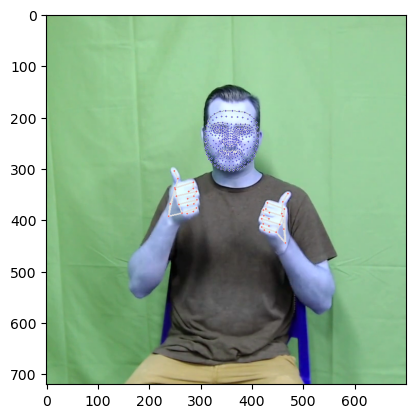

In [10]:
#test for 1 frame
for i in range(0,1):
    img=frameovi[260+i]
    resultsFace=findFace(img)
    resultsHands=findHands(img)
    
    plt.imshow(drawLandmarks(img.copy(),resultsFace,resultsHands))
    plt.show()
  # cv2.imshow("a",imga)
    time.sleep(0.2)

(720, 700, 3)


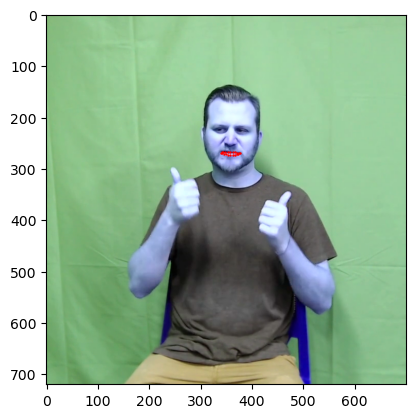

In [11]:
img=frameovi[260]
resultsFace=findFace(img) #using function defined above to detect facial landmarks in a frame (findFace)
#resultsHands=findHands(img) 
print(img.shape)
plt.imshow(img)
landmarkovi=resultsFace.multi_face_landmarks[0]
#fig=plt.figure(figsize=(7,7))

lips=getLipsLandmarks(resultsFace,scale=True)
for i in  lips:
    plt.scatter(i[0],i[1],color="red",s=0.5)
plt.show()

In [109]:
landmarkovi.landmark[i].x*300,landmarkovi.landmark[i].y*200,landmarkovi.landmark[i].z

(165.52430391311646, 81.22453093528748, -0.01029624417424202)

In [111]:
landmarkovi.landmark[i+1].x*300,landmarkovi.landmark[i+1].y*200,landmarkovi.landmark[i+1].z

(177.56059169769287, 81.8043053150177, 0.012142329476773739)

In [115]:
getLipsLandmarks(resultsFace)

[(0.5031233429908752, 0.4078024625778198, -0.0013904226943850517),
 (0.5055251121520996, 0.4048118442296982, -0.006838299799710512),
 (0.5091571509838104, 0.4026859551668167, -0.012821241281926632),
 (0.514033168554306, 0.4002390503883362, -0.01844550110399723),
 (0.5209281742572784, 0.3986869752407074, -0.022887997329235077),
 (0.5283405482769012, 0.3992815166711807, -0.0246092788875103),
 (0.5364257097244263, 0.39893659949302673, -0.024120839312672615),
 (0.5442889928817749, 0.40086983144283295, -0.02098756656050682),
 (0.5500966608524323, 0.40347185730934143, -0.016324404627084732),
 (0.554611325263977, 0.4057198613882065, -0.0109712528064847),
 (0.5574724078178406, 0.40878407657146454, -0.005799406673759222),
 (0.5538562536239624, 0.4113215506076813, -0.009714334271848202),
 (0.5498345196247101, 0.413113996386528, -0.014481160789728165),
 (0.5437861979007721, 0.4151636064052582, -0.01815829426050186),
 (0.5364094376564026, 0.4166368097066879, -0.02124934270977974),
 (0.528038501739